In [59]:
import time
import torch
import torchvision
import sklearn
import PIL
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc

In [60]:
def create_data(low, high, data_size,type='int', is_np=True):
    if type == 'int':
        data = np.random.randint(low, high, data_size)
    elif type == 'float':
        data = np.random.uniform(low, high, data_size)
    elif type == 'complex':
        data = np.random.uniform(low, high, data_size) + 1j*np.random.uniform(low, high, data_size)
        return data
    
    if not is_np:
        return list(data)
    return data

In [61]:
datasize = (10,)

### Q1

In [57]:
def sum_(data):
    assert np.array(data).ndim == 1, "data must be 1-dimentional array"
    # return np.sum(data)
    _sum_ = 0
    for i in data:
        _sum_ += i
    return _sum_
    

data = create_data(0, 1, datasize, type='float')
data

array([0.98523904, 0.15249019, 0.04938501, 0.37874557, 0.94711505,
       0.63100991, 0.55057706, 0.37195881, 0.60554359, 0.17990259])

In [6]:
print(sum_(data))
print(np.sum(data))

5.25336447790661
5.25336447790661


### Q2

In [7]:
def settify(data):
    return list(set(data))

data = create_data(0, 10, datasize, type='int')

print(sorted(settify(data)))
print(sorted(data))

[0, 3, 4, 5, 6, 8, 9]
[0, 3, 3, 4, 5, 6, 6, 6, 8, 9]


### Q3

In [8]:
def check_palindrome(words):
    # we assume that words is a string,and each word is a lower word
    assert words == words.lower(), "words must be a lower word"
    words = words.split(' ')
    words = ''.join(words)
    
    return words == words[::-1]

samples = ['madam','nurses run', ' a a a as s sb ', '  a  bc   b  a  ']

for sample in samples:
    print(sample, check_palindrome(sample))

madam True
nurses run True
 a a a as s sb  False
  a  bc   b  a   True


### Q4

In [17]:
data = create_data(0, 1, datasize, type='complex')
print(data)
np.array(list(zip(data.real,data.imag)))

[0.59547035+0.47771177j 0.35880004+0.71799496j 0.14164719+0.48051938j
 0.28950193+0.68940753j 0.56801159+0.46479811j 0.08294228+0.85067877j
 0.01300982+0.12763018j 0.37549551+0.65587332j 0.90875417+0.81476913j
 0.8562367 +0.97846783j]


array([[0.59547035, 0.47771177],
       [0.35880004, 0.71799496],
       [0.14164719, 0.48051938],
       [0.28950193, 0.68940753],
       [0.56801159, 0.46479811],
       [0.08294228, 0.85067877],
       [0.01300982, 0.12763018],
       [0.37549551, 0.65587332],
       [0.90875417, 0.81476913],
       [0.8562367 , 0.97846783]])

### Q5

In [ ]:
data = ('12','21')
# 转10再操作
def add_ternary(data):
    sum_ = sum(int(num, 3) for num in data)
    # print(sum_)
    
    if sum_ == 0:
        return "0"
    
    output = ""
    while sum_ > 0:
        output = str(sum_ % 3) + output
        sum_ //= 3
    
    return output

print(add_ternary(data))

110


### Q6

In [58]:

class ListNode:
    def __init__(self,x):
        self.val=x
        self.next=None
        
def make_link(data):
    assert len(data) > 0, "data must be non-empty"
    
    if len(data) == 1:
        return ListNode(data[0])
    
    head = ListNode(data[0])
    cur = head
    for i in data[1:-1]:
        cur.next = ListNode(i)
        cur = cur.next
        
    if data[-1] == 0:
        cur.next = None
    else:
        cur.next = ListNode(data[-1])
        
    return head

def print_link(link):
    cur = link
    while cur.next:
        print(cur.val,'->',end=' ')
        cur = cur.next
    print(cur.val)
    print()

def link_add(link1,link2):
    result = []
    cache_num = 0
    while link1 or link2:
        both = 2
        
        if link1:
            result.append(link1.val)
            link1 = link1.next
            both -= 1
        if link2:
            result.append(link2.val)
            link2 = link2.next
            both -= 1
        
        result[-1] += cache_num
        if both == 0:
            result.append(result.pop()+result.pop())
        
        cache_num = 0 if result[-1] < 10 else 1
        result[-1] = result[-1] % 10

    result.append(cache_num)
    linked_ = make_link(result)
    
    return linked_

link1 = make_link([2,4,3])
link2 = make_link([5,6,4])
out = link_add(link1,link2)
print_link(out)

7 -> 0 -> 8



In [ ]:
test_cases = [
    ([2, 4, 3, 0], [5, 6, 4]),  # 342 + 465 = 807
    ([0], [0]),              # 0 + 0 = 0
    ([9, 9, 9], [1]),        # 999 + 1 = 1000
    ([1, 8], [0]),           # 81 + 0 = 81
    ([5, 6, 4], [2, 4, 3]),  # 465 + 342 = 807
]

for l1, l2 in test_cases:
    link1 = make_link(l1)
    link2 = make_link(l2)
    print(f"输入: {l1} + {l2}")
    result = link_add(link1, link2)
    print("输出: ", end="")
    print_link(result)
    print("-" * 30)

输入: [2, 4, 3, 0] + [5, 6, 4]
输出: 7 -> 0 -> 8

------------------------------
输入: [0] + [0]
输出: 0

------------------------------
输入: [9, 9, 9] + [1]
输出: 0 -> 0 -> 0 -> 1

------------------------------
输入: [1, 8] + [0]
输出: 1 -> 8

------------------------------
输入: [5, 6, 4] + [2, 4, 3]
输出: 7 -> 0 -> 8

------------------------------


### Q7 - Q10

In [55]:
class SortClass(object):
    def __init__(self):
        pass
    
    def bubble(self, data, asscending=True):
        
        for i in range(len(data)):
            mark = False
            for j in range(len(data) - i - 1):
                if data[j] > data[j + 1]:
                    data[j], data[j + 1] = data[j + 1], data[j]
                    mark = True
            if not mark:
                break
            
        if asscending:
            return data
        return data[::-1]
    
    def merge(self, data, asscending=True):
        if len(data) <= 1:
            return data
        mid = len(data) // 2
        left = self.merge(data[:mid])
        right = self.merge(data[mid:])
        data = []
        
        while left and right:
            if left[0] < right[0]:
                data.append(left.pop(0))
            else:
                data.append(right.pop(0))
                
        data += left
        data += right

        if asscending:
            return data
        return data[::-1]

    def quick(self, data, asscending=True):
        if len(data) <= 1:
            return data
        
        def partition(lst,start,end):
            pivot = lst[start]

            while start < end :
                while start < end and lst[end] >= pivot:
                    end -= 1
                lst[start] = lst[end]

                while start < end and lst[start] <= pivot:
                    start += 1
                lst[end] = lst[start]

            lst[start] = pivot
            return start
        
        pivot = partition(data,0,len(data)-1)
        data = self.quick(data[:pivot]) + [data[pivot]] + self.quick(data[pivot+1:])
        if asscending:
            return data
        return data[::-1]
    
    def heap(self, data, asscending=True):
        # 最大堆
        def heapify(data, n, i):
            larger = i
            l = 2 * i + 1
            r = 2 * i + 2
            if l < n:
                if data[i] < data[l]:
                    larger = l
            if r < n:
                if data[larger] < data[r]:
                    larger = r
                    
            if larger != i:
                data[i], data[larger] = data[larger], data[i]
                heapify(data, n, larger)
        
        num = len(data)
        for i in range(num // 2 - 1, -1, -1):
            heapify(data, num, i)
        data_ = []
        
        for i in range(num - 1, -1, -1):
            data[i], data[0] = data[0], data[i]
            data_.append(data.pop())  
            heapify(data, i, 0)

        if asscending:
            return data_[::-1]
        return data_
    
    def __call__(self, *args, **kwds):
        pass

In [56]:
datasize = (10,)
data = create_data(0,20, datasize, type='int', is_np=False)
sorter = SortClass()
print(sorter.bubble(data, asscending=True))
print(sorter.merge(data, asscending=False))
print(sorter.quick(data, asscending=True))
print(sorter.heap(data, asscending=False))

[1, 3, 9, 11, 12, 12, 14, 14, 14, 17]
[17, 14, 14, 14, 12, 12, 11, 9, 3, 1]
[1, 3, 9, 11, 12, 12, 14, 14, 14, 17]
[17, 14, 14, 14, 12, 12, 11, 9, 3, 1]


### Q11

In [50]:
x = torch.tensor(sorted(create_data(0,1, datasize, type='float')))
y = torch.tensor(sorted(create_data(0,5, datasize, type='float')))

loss_fn = torch.nn.MSELoss()

# y = w1 * x + w2
w = torch.randn((2,), requires_grad=True)   # w = [w1, w2]
x, w, y

(tensor([0.1355, 0.1761, 0.2076, 0.3228, 0.4157, 0.5496, 0.6031, 0.7314, 0.9269,
         0.9468], dtype=torch.float64),
 tensor([ 1.5755, -0.7996], requires_grad=True),
 tensor([0.6953, 0.9338, 1.2851, 1.9325, 1.9410, 1.9643, 2.0449, 2.1092, 3.5268,
         4.1735], dtype=torch.float64))

In [51]:
model = lambda x,w: w[0] * x + w[1]
print(w[0] * x + w[1])
model(x, w)

tensor([-0.5861, -0.5221, -0.4724, -0.2909, -0.1447,  0.0663,  0.1506,  0.3528,
         0.6608,  0.6922], dtype=torch.float64, grad_fn=<AddBackward0>)


tensor([-0.5861, -0.5221, -0.4724, -0.2909, -0.1447,  0.0663,  0.1506,  0.3528,
         0.6608,  0.6922], dtype=torch.float64, grad_fn=<AddBackward0>)

In [52]:

def train(x, y, model, epochs, lr_rate, loss_fn, params):
    for epoch in range(epochs):
        if params.grad is not None:
            params.grad.zero_()
            
        y_hat = model(x, params)
        loss = loss_fn(y_hat, y)
        loss.backward()
        
        with torch.no_grad():
            params -= lr_rate * params.grad
            
        if epoch % 100 == 0:
            print(f'epoch: {epoch+1}, loss: {loss.item():.6f}')
            
    return params

trained_w = train(x, y, model, epochs=1000, lr_rate=0.01, loss_fn=loss_fn, params=w)


epoch: 1, loss: 4.675449
epoch: 101, loss: 0.215417
epoch: 201, loss: 0.178608
epoch: 301, loss: 0.170110
epoch: 401, loss: 0.163646
epoch: 501, loss: 0.158641
epoch: 601, loss: 0.154765
epoch: 701, loss: 0.151763
epoch: 801, loss: 0.149438
epoch: 901, loss: 0.147638


In [53]:
print(w)

tensor([3.0872, 0.5205], requires_grad=True)


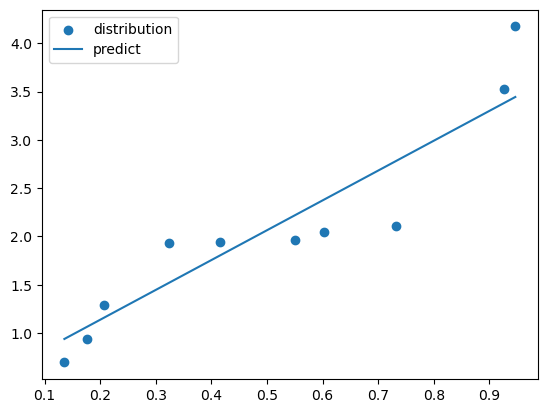

In [54]:
plt.scatter(x, y,label='distribution')
plt.plot(x, model(x, trained_w.detach().numpy()),label='predict')
plt.legend(loc='upper left')
plt.show()

### Q12

In [167]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([160, 4]),
 torch.Size([160]),
 torch.Size([40, 4]),
 torch.Size([40]))

In [175]:
loss_fn = torch.nn.BCELoss()
# y = w1 * x + w2
w = torch.rand((5,1), requires_grad=True)   # w = [w1, w2, w3, w4, b]
w.shape, w[-1,0]

(torch.Size([5, 1]), tensor(0.8603, grad_fn=<SelectBackward0>))

In [176]:
model = lambda x,w: torch.sigmoid(torch.matmul(x, w[:-1,0]) + w[-1,0])
model(x_train, w).size()

torch.Size([160])

In [177]:
def train(x, y, model, epochs, lr_rate, loss_fn, params):
    for epoch in range(epochs):
        if params.grad is not None:
            params.grad.zero_()
            
        y_hat = model(x, params)
        loss = loss_fn(y_hat, y)
        loss.backward()
        
        with torch.no_grad():
            params -= lr_rate * params.grad
            
        if epoch % 200 == 0:
            print(f'epoch: {epoch+1}, loss: {loss.item():.6f}')
            
    return params

trained_w = train(x_train, y_train, model, epochs=1000, lr_rate=0.05, loss_fn=loss_fn, params=w)

epoch: 1, loss: 0.619757
epoch: 201, loss: 0.366589
epoch: 401, loss: 0.351275
epoch: 601, loss: 0.347438
epoch: 801, loss: 0.346143


In [178]:
def trans_y(y_hat, threshold=0.5):
    return (y_hat > threshold).float()

y_hat = trans_y(model(x_test, trained_w.detach()))

print(acc(y_hat,y_test))
# y_hat.shape, y_test.shape

0.9


In [179]:
y_test[:10], y_hat[:10]

(tensor([1., 0., 1., 1., 1., 0., 1., 1., 0., 0.]),
 tensor([1., 1., 1., 1., 0., 0., 1., 1., 0., 0.]))

### Q13

In [116]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=5, n_classes=2, random_state=42)
y = 2 * y - 1

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
x_train.shape, y_train.shape

(torch.Size([160, 5]), torch.Size([160]))

In [117]:
def hinge_lossfn():
    def hinge_loss(y_hat, y_true):
        return torch.mean(torch.max(torch.tensor(0.), 1 - y_true * y_hat))
    return hinge_loss

loss_fn = hinge_lossfn()
# y = w1 * x + w2
w = torch.rand((x_train.shape[1]+1,1), requires_grad=True)
w.shape, w[-1,0]

(torch.Size([6, 1]), tensor(0.5367, grad_fn=<SelectBackward0>))

In [118]:
model = lambda x,w: torch.matmul(x, w[:-1]) + w[-1]
model(x_train,w).size()

torch.Size([160, 1])

In [119]:
loss_fn = hinge_lossfn()

lr = 0.01

epochs = 700

for epoch in range(epochs):
    if w.grad is not None:
        w.grad.zero_()

    y_pred = model(x_train, w)
    
    loss = loss_fn(y_pred.squeeze(), y_train)
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad

    y_pred = torch.sign(y_pred.squeeze())
    accuracy = (y_pred == y_train).float().mean()

    if epoch % 100 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.6f}, Accuracy: {accuracy.item():.4f}")

y_test_pred = model(x_test, w)
y_test_pred_label = torch.sign(y_test_pred.squeeze())  # 预测标签
accuracy_test = (y_test_pred_label == y_test).float().mean()

print(f"Test Accuracy: {accuracy_test.item():.4f}")
print(f"Trained weights: {w}")
print(f"Trained bias: {b}")


Epoch 1, Loss: 0.841819, Accuracy: 0.6000
Epoch 101, Loss: 0.578425, Accuracy: 0.7625
Epoch 201, Loss: 0.462839, Accuracy: 0.8000
Epoch 301, Loss: 0.416798, Accuracy: 0.8500
Epoch 401, Loss: 0.392021, Accuracy: 0.8562
Epoch 501, Loss: 0.377468, Accuracy: 0.8562
Epoch 601, Loss: 0.369183, Accuracy: 0.8500
Test Accuracy: 0.8500
Trained weights: tensor([[ 0.9757],
        [-0.3489],
        [ 0.0664],
        [ 1.1054],
        [ 0.9682],
        [ 0.1171]], requires_grad=True)
Trained bias: tensor([0.1355], requires_grad=True)


### Q14

In [150]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=10, n_classes=2, random_state=42)
y = 2 * y - 1

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
x_train.shape, y_train.shape

(torch.Size([160, 10]), torch.Size([160]))

In [151]:
def hinge_lossfn():
    def hinge_loss(y_hat, y_true):
        return torch.mean(torch.max(torch.tensor(0.), 1 - y_true * y_hat))
    return hinge_loss

loss_fn = hinge_lossfn()
# y = w1 * x + w2
w = torch.rand((x_train.shape[1]+1,1), requires_grad=True)
w.shape, w[-1,0]

(torch.Size([11, 1]), tensor(0.3918, grad_fn=<SelectBackward0>))

In [152]:
model = lambda x,w: torch.matmul(x, w[:-1]) + w[-1]
model(x_train,w).size()

torch.Size([160, 1])

In [156]:
def f_norm(w):
    return torch.sqrt(torch.sum(w**2))
A = f_norm(w)
A

tensor(1.5582, grad_fn=<SqrtBackward0>)

In [154]:
loss_fn = hinge_lossfn()

lr = 0.01

epochs = 700

for epoch in range(epochs):
    if w.grad is not None:
        w.grad.zero_()

    y_pred = model(x_train, w)
    
    loss_hinge = loss_fn(y_pred.squeeze(), y_train)
    f_norm_ = torch.norm(w, p='fro') # f_norm(w)
    
    loss = loss_hinge + 0.001 *  f_norm_
    
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad

    y_pred = torch.sign(y_pred.squeeze())
    accuracy = (y_pred == y_train).float().mean()

    if epoch % 100 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.6f}, Accuracy: {accuracy.item():.4f}")

y_test_pred = model(x_test, w)
y_test_pred_label = torch.sign(y_test_pred.squeeze())  # 预测标签
accuracy_test = (y_test_pred_label == y_test).float().mean()

print(f"Test Accuracy: {accuracy_test.item():.4f}")
print(f"Trained weights: {w}")
print(f"Trained bias: {b}")

Epoch 1, Loss: 1.286651, Accuracy: 0.4812
Epoch 101, Loss: 0.772187, Accuracy: 0.6438
Epoch 201, Loss: 0.508280, Accuracy: 0.7875
Epoch 301, Loss: 0.421605, Accuracy: 0.8625
Epoch 401, Loss: 0.390645, Accuracy: 0.8625
Epoch 501, Loss: 0.372987, Accuracy: 0.8750
Epoch 601, Loss: 0.362312, Accuracy: 0.8750
Test Accuracy: 0.8500
Trained weights: tensor([[ 0.2534],
        [ 0.3980],
        [ 0.3295],
        [ 0.0357],
        [-0.0287],
        [ 0.0903],
        [-0.0947],
        [ 1.4399],
        [ 0.0095],
        [-0.0628],
        [-0.0160]], requires_grad=True)
Trained bias: tensor([0.1355], requires_grad=True)


### Q15

#### Q15.1 linear regression

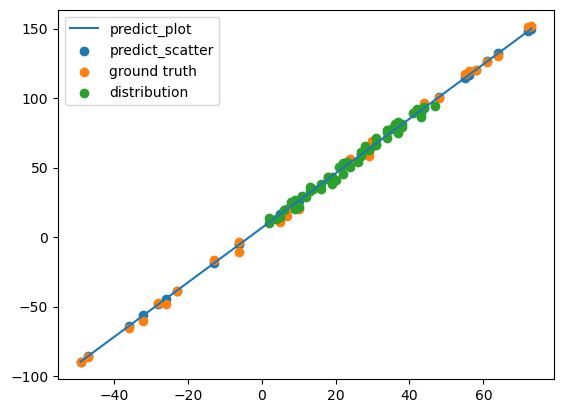

In [32]:
from sklearn.linear_model import LinearRegression

x = np.sort(np.random.randint(0,50,(50,1)), axis=0)
y = 2 * x + np.random.uniform(0,10,(50,1))

x_test = np.sort(np.random.randint(-50,80,(30,1)), axis=0)
y_test = 2 * x_test + np.random.uniform(0,10,(30,1))
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x_test)

plt.plot(x_test,y_hat,label='predict_plot')
plt.scatter(x_test,y_hat,label='predict_scatter')
plt.scatter(x_test,y_test,label='ground truth')
plt.scatter(x, y,label='distribution')
plt.legend()

In [33]:
print(f'mae: {round(mae(y_hat, y_test),2)}')
print(f'mape:{round(np.mean((y_hat-y_test)/y_test)*100,2)}%')

mae: 2.5
mape:4.11%


### Q15.2 logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

x, y = make_classification(n_samples=500, n_features=30, n_classes=2, random_state=42)
print(x.shape, y.shape)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

print('accuracy:', round(acc(y_test, y_hat),2))
print(y_hat[10:20])
print(y_test[10:20])

(500, 30) (500,)
accuracy: 0.85
[0 1 1 0 1 0 0 1 1 1]
[0 1 1 0 1 1 0 1 1 1]


#### Q15.3 SVM

In [37]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
data = load_iris()
x = data.data
y = data.target
print(x.shape, y.shape)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

print('accuracy:', round(acc(y_test, y_hat),2))
print(y_hat[10:20])
print(y_test[10:20])

(150, 4) (150,)
accuracy: 0.9
[2 1 1 0 0 1 1 2 0 1]
[2 1 1 0 0 1 1 2 0 2]


### Q16

In [5]:
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False)

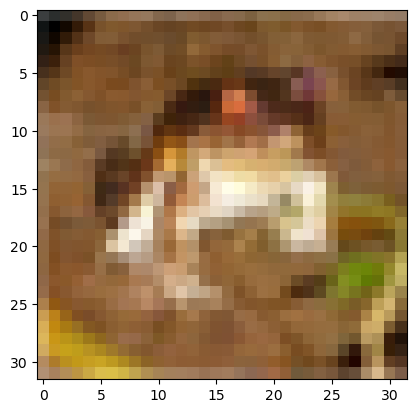

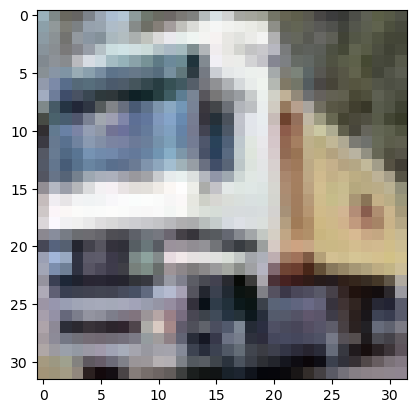

In [42]:
img_iter = iter(dataset)
for i in range(2):
    img, label = next(img_iter)
    img = np.array(img)
    plt.imshow(img)
    plt.show()

### Q17

In [3]:
class DatasetCifar10(Dataset):
    def __init__(self, root, train=True, transforms=None, target_transform=None, download=False):
        
        self.dataset = torchvision.datasets.CIFAR10(root,
                                                    train=train,
                                                    download=download,
                                                    )
        self.transforms = transforms
        self.target_transform = target_transform
    def __getitem__(self, index, is_transform=True, is_target_transform=True):
        img, label = self.dataset[index]
        
        if is_transform:
            img = self.transforms(img)
        if is_target_transform:
            label = self.target_transform(label)
            
        return img, label
    
    def __len__(self):
        return len(self.dataset)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
target_transform = transforms.Compose([
    transforms.Lambda(lambda x: x/10),
])

Cifar10_train = DatasetCifar10(root='./data', train=True, download=False, transforms=transform, target_transform=target_transform)
Cifar10_test = DatasetCifar10(root='./data', train=False, download=False, transforms=transform, target_transform=target_transform)

training = DataLoader(dataset=Cifar10_train, batch_size=4, shuffle=False)
testing = DataLoader(dataset=Cifar10_test, batch_size=4, shuffle=False)


In [4]:
print(training.__len__(), testing.__len__(), Cifar10_train.__len__(), Cifar10_test.__len__())
print(Cifar10_test.__getitem__(1))
print(Cifar10_test.__getitem__(1, is_transform=False, is_target_transform=False))

12500 2500 50000 10000
(tensor([[[ 0.8431,  0.8118,  0.8196,  ...,  0.8275,  0.8275,  0.8196],
         [ 0.8667,  0.8431,  0.8431,  ...,  0.8510,  0.8510,  0.8431],
         [ 0.8588,  0.8353,  0.8353,  ...,  0.8431,  0.8431,  0.8353],
         ...,
         [-0.3176, -0.6627, -0.8510,  ...,  0.3255,  0.4275,  0.4745],
         [-0.3569, -0.6392, -0.7176,  ...,  0.3647,  0.4510,  0.4667],
         [-0.3333, -0.5137, -0.5451,  ...,  0.3176,  0.4118,  0.4588]],

        [[ 0.8431,  0.8118,  0.8196,  ...,  0.8275,  0.8275,  0.8196],
         [ 0.8667,  0.8431,  0.8431,  ...,  0.8510,  0.8510,  0.8431],
         [ 0.8588,  0.8353,  0.8353,  ...,  0.8431,  0.8431,  0.8353],
         ...,
         [-0.2235, -0.6000, -0.8196,  ...,  0.4431,  0.5451,  0.5843],
         [-0.2471, -0.5529, -0.6549,  ...,  0.4824,  0.5686,  0.5843],
         [-0.2078, -0.4118, -0.4745,  ...,  0.4353,  0.5294,  0.5686]],

        [[ 0.8431,  0.8118,  0.8196,  ...,  0.8275,  0.8275,  0.8196],
         [ 0.8667,  0

In [ ]:
for counter, (img, label) in enumerate(testing):
    print(img.shape, label)
    
    if counter == 5:
        break

torch.Size([4, 3, 32, 32]) tensor([0.3000, 0.8000, 0.8000, 0.0000], dtype=torch.float64)
torch.Size([4, 3, 32, 32]) tensor([0.6000, 0.6000, 0.1000, 0.6000], dtype=torch.float64)
torch.Size([4, 3, 32, 32]) tensor([0.3000, 0.1000, 0.0000, 0.9000], dtype=torch.float64)
torch.Size([4, 3, 32, 32]) tensor([0.5000, 0.7000, 0.9000, 0.8000], dtype=torch.float64)
torch.Size([4, 3, 32, 32]) tensor([0.5000, 0.7000, 0.8000, 0.6000], dtype=torch.float64)
torch.Size([4, 3, 32, 32]) tensor([0.7000, 0.0000, 0.4000, 0.9000], dtype=torch.float64)


### Q18

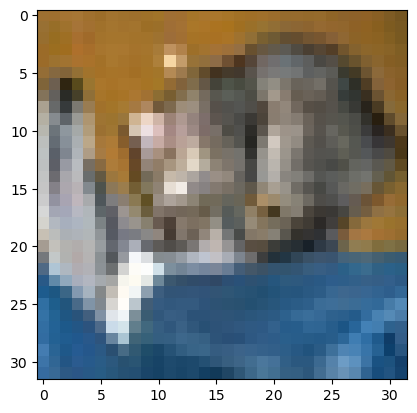

In [32]:
from torchvision import transforms
# Read and learn how to use torchvision.transforms to transform images. 
# transforms.ToTensor()
# transforms.Normalize()
# transforms.RandomCrop()
# transforms.RandomHorizontalFlip()
# transforms.RandomRotation()
# transforms.RandomAffine()
# transforms.ColorJitter()
# transforms.RandomGrayscale()
# transforms.RandomPerspective()
# transforms.RandomErasing()
# transforms.Resize()
# transforms.CenterCrop()
# transforms.RandomResizedCrop()
# transforms.Grayscale()
# transforms.ToPILImage()

sample_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=False)
img = sample_data.__getitem__(0)
plt.imshow(img[0])

In [29]:
tensor_data = torchvision.transforms.ToTensor()(sample_data[0][0])
print(tensor_data.size(), type(tensor_data))

normalized_data = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(tensor_data)
print(normalized_data.max(), normalized_data.min())

torch.Size([3, 32, 32]) <class 'torch.Tensor'>
tensor(1.) tensor(-0.8980)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


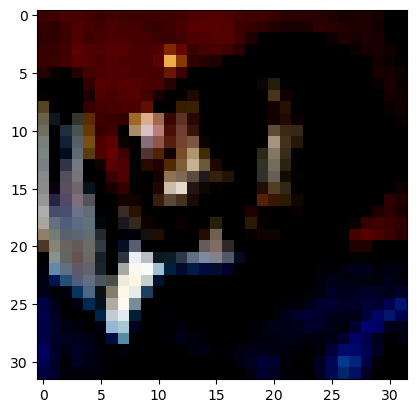

In [36]:
# plt.imshow(tensor_data.permute(1, 2, 0))
plt.imshow(normalized_data.permute(1, 2, 0))

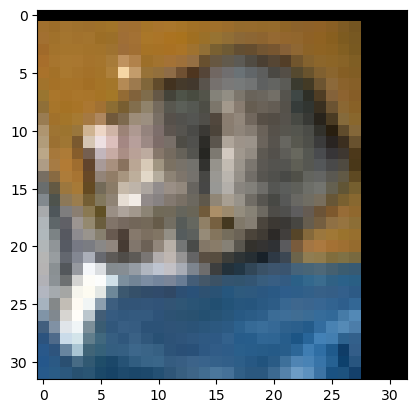

In [38]:
randomcrop_data = transforms.RandomCrop(32, padding=4)(tensor_data)
plt.imshow(randomcrop_data.permute(1, 2, 0))

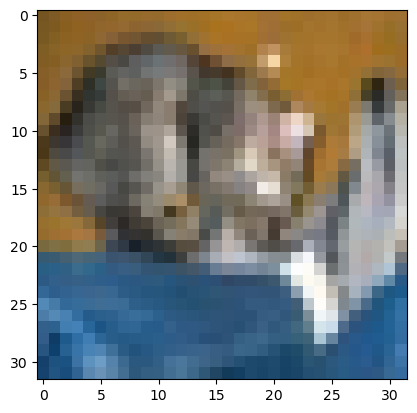

In [42]:
ran_hori_flip = transforms.RandomHorizontalFlip()(tensor_data)
plt.imshow(ran_hori_flip.permute(1, 2, 0))

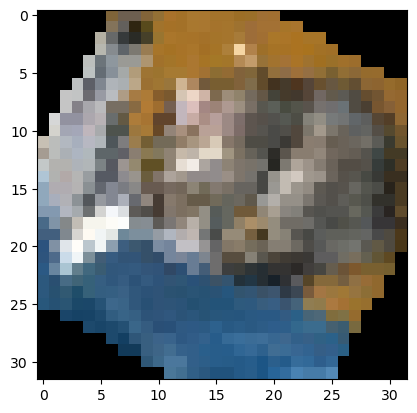

In [43]:
randomrotation = transforms.RandomRotation(45)(tensor_data)
plt.imshow(randomrotation.permute(1, 2, 0))

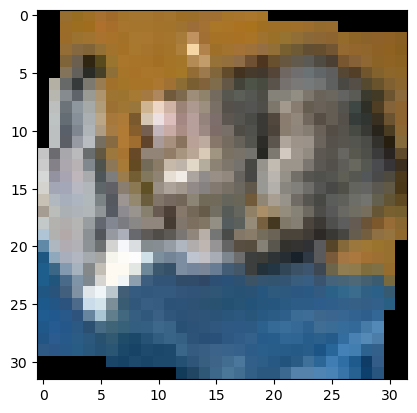

In [44]:
randomaffine = transforms.RandomAffine(45)(tensor_data)
plt.imshow(randomaffine.permute(1, 2, 0))

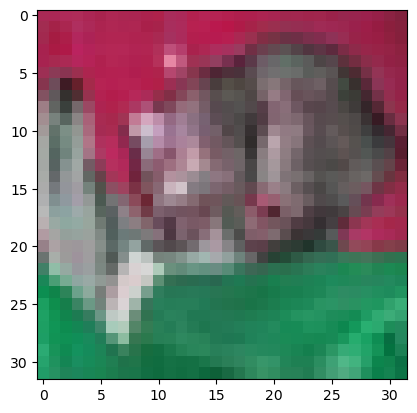

In [45]:
colorjitter = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)(tensor_data)
plt.imshow(colorjitter.permute(1, 2, 0))

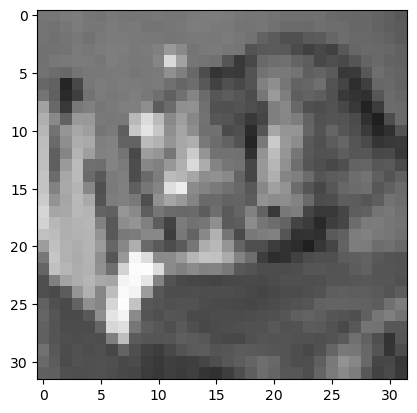

In [50]:
randomgrayscale = transforms.RandomGrayscale(0.7)(tensor_data)
plt.imshow(randomgrayscale.permute(1, 2, 0))

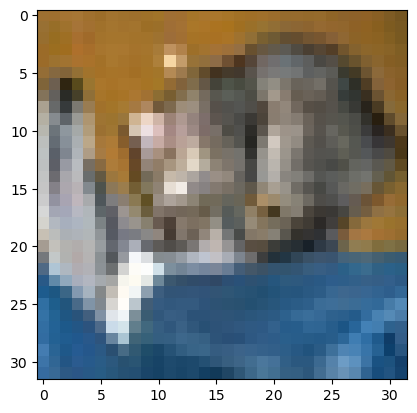

In [54]:
randomperspective = transforms.RandomPerspective(0.9)(tensor_data)
plt.imshow(randomperspective.permute(1, 2, 0))

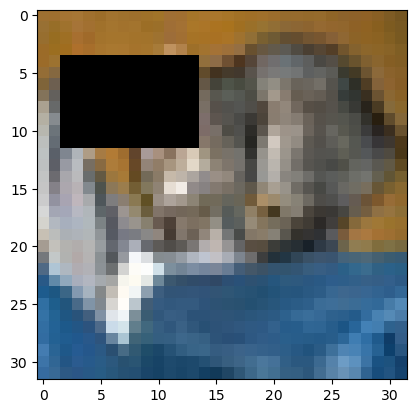

In [62]:
randomerasing = transforms.RandomErasing(1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)(tensor_data)
plt.imshow(randomerasing.permute(1, 2, 0))

torch.Size([3, 16, 16])


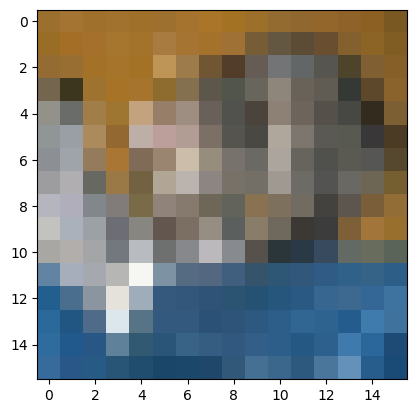

In [65]:
resize = transforms.Resize(16)(tensor_data)
print(resize.size())
plt.imshow(resize.permute(1, 2, 0))

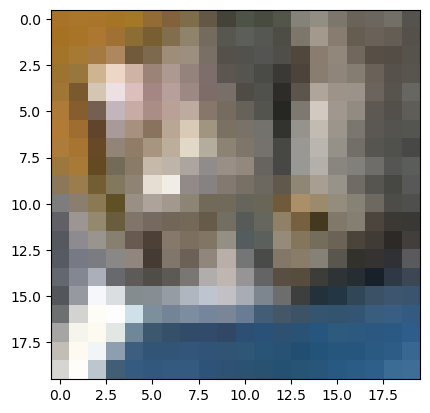

In [70]:
centercrop = transforms.CenterCrop(20)(tensor_data)
plt.imshow(centercrop.permute(1, 2, 0))

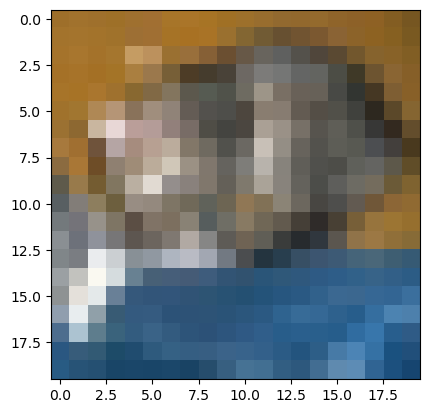

In [72]:
ran_resizedcrop = transforms.RandomResizedCrop(20)(tensor_data)
plt.imshow(ran_resizedcrop.permute(1, 2, 0))

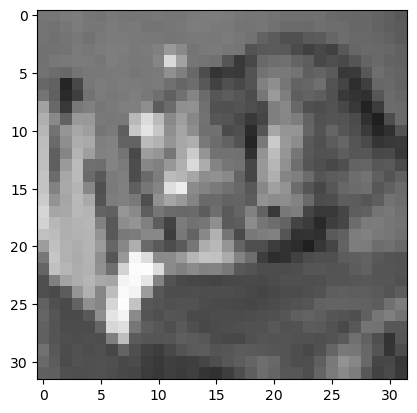

In [79]:
grayscale = transforms.Grayscale(3)(tensor_data)
plt.imshow(grayscale.permute(1, 2, 0))

<class 'PIL.Image.Image'>


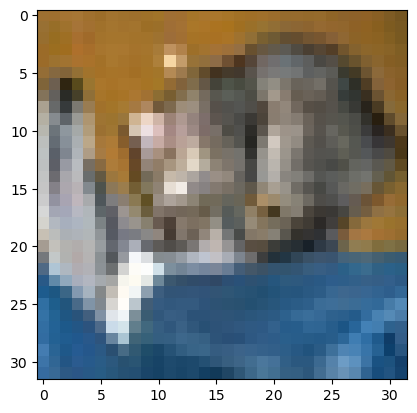

In [82]:
topil = transforms.ToPILImage()(tensor_data)
print(type(topil))
plt.imshow(topil)

### Q19

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
Cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
Cifar10_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)

def timeit(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        print(time.time() - start)
        return result
    return wrapper

def test_time(dataset, batch_list=None, worker_list=None, test_pin = False):
    
    @timeit
    def time_running(dataset, batch=64, num_workers=0, pin_memory=False):
        try:
            dataloader = DataLoader(dataset=dataset,
                                    batch_size=batch,
                                    num_workers=num_workers,
                                    pin_memory=pin_memory)    
            for batch in dataloader:
                pass
            
        except Exception as e:
            print(f"Error: {e}")
        
    if batch_list:    
        for batch in batch_list:
            print(f"batch of {batch}:", end=' ')
            time_running(dataset, batch=batch)
            
    elif worker_list:
        for num in worker_list:
            print(f"num_workers of {num}:", end=' ')
            time_running(dataset, num_workers=num)
            
    elif test_pin:
        print(f"pin_memory if True:", end=' ')
        time_running(dataset, pin_memory=True)
        print(f'pin_memory if False:', end=' ')
        time_running(dataset, pin_memory=False)


In [ ]:
# test difference between batch size
test_time(Cifar10_train, batch_list=[1, 4, 64, 1024])

batch of 1: 7.446024179458618
batch of 4: 6.033214807510376
batch of 64: 5.385905027389526
batch of 1024: 5.665543079376221


In [26]:
# test difference between num_workers
# dont use any library function in '__getitem__' when create dataset to avoid Running frozen error
test_time(Cifar10_train, worker_list=[0, 1, 4, 16])

num_workers of 0: 5.741513013839722
num_workers of 1: 7.366116523742676
num_workers of 4: 7.922229051589966
num_workers of 16: 26.429657220840454


In [27]:
# test difference using pin_memory or not
test_time(Cifar10_train, test_pin=True)

pin_memory if True: 5.285048723220825
pin_memory if False: 5.527175188064575


- 这里的提速效果不明显，可能是数据集不够大 or 电脑性能不咋地的原因..
- 所以这里没有明显提速，但是可以明显感觉到使用多进程读取数据会使得程序运行速度变慢，因为内存有限，worker太多会反复换线。
- batch设太大加速不明显，估计也是内存问题了

### Q20

In [31]:
Cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=False)
print(Cifar10_train.data.data.shape)

mean = [np.mean(Cifar10_train.data[:, :, :, i]) for i in range(3)]
std = [np.std(Cifar10_train.data[:, :, :, i]) for i in range(3)]
print(f'mean = {mean} \n std = {std}')

(50000, 32, 32, 3)
mean = [125.306918046875, 122.950394140625, 113.86538318359375] 
 std = [62.993219278136884, 62.08870764001421, 66.70489964063091]


### Q21

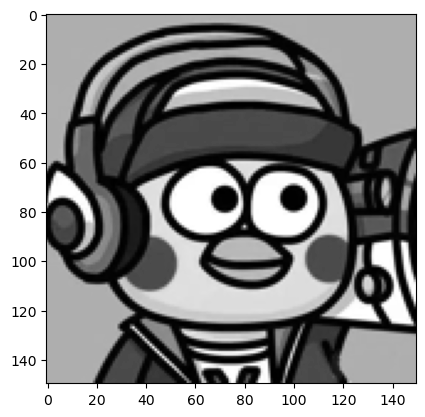

In [53]:
img = Image.open('kun.jpg')
img = img.resize((150, 150))
width, height = img.size
greys = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        r, g, b = img.getpixel((x, y))
        converted = 0.2126 * r + 0.7152 * g + 0.0722 * b
        greys[y, x] = converted
plt.imshow(greys, cmap='gray')

In [54]:
characters = "Ñ@#W$9876543210?!abc;:+=-,._ "
greys_ch = ((greys / 255) * (len(characters) - 1)).astype(int)
# np.max(greys_ch)
char_img = ''
for x in range(width):
    for y in range(height):
        char_img += characters[greys_ch[x, y]]
    char_img += '\n'

with open('char_kun.txt', 'w') as f:
    f.write(char_img)

### Q22

#### Q22.1

In [3]:
# Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates
matrix = np.random.rand(10,2)
def cal_radius(x, y):
    return np.sqrt(x**2 + y**2)

def cal_theta(x, y):
    return np.arctan2(y, x)

radius = cal_radius(matrix[:,0], matrix[:,1]).reshape(-1,1)
theta = cal_theta(matrix[:,0], matrix[:,1]).reshape(-1,1)
output = np.concatenate([radius, theta], axis=-1)
output

array([[0.33306377, 0.82891861],
       [0.63069257, 0.59228528],
       [1.05355857, 1.17849968],
       [0.37687855, 0.32408711],
       [0.89494981, 0.39730617],
       [1.06387491, 0.35324401],
       [0.45225698, 0.28687018],
       [0.42459471, 0.70159548],
       [0.88663531, 0.5206293 ],
       [0.32616581, 0.22591875]])

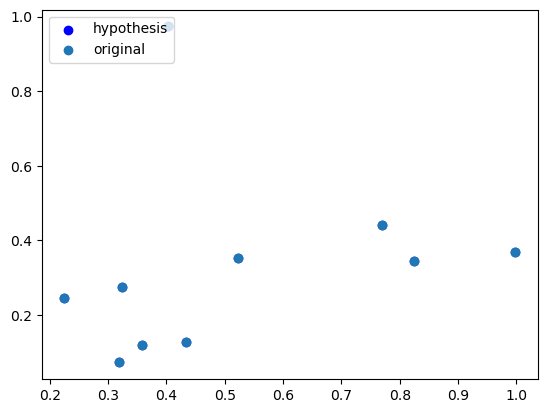

In [ ]:
y_h = output[:,0] * np.sin(output[:,1])
x_h = output[:,0] * np.cos(output[:,1])
plt.scatter(x_h, y_h,c='b',label='hypothesis')
plt.scatter(matrix[:,0], matrix[:,1],label='original')
plt.legend(loc='upper left')
plt.show()
# 完全重合

#### Q22.2

In [ ]:
# Create a 2D array subclass such that Z[i, j] == Z[j, i]

class SymmetricArray(np.ndarray):
    def __new__(cls, shape, dtype=float):
        obj = super().__new__(cls, shape, dtype)
        random_data = np.random.rand(*shape)
        
        random_data = (random_data + random_data.T) / 2  
        np.copyto(obj, random_data)     # 防止改掉obj再次new时的默认值
        
        return obj
    
    def __setitem__(self, index, value):
        i, j = index
        super(SymmetricArray, self).__setitem__((i, j), value)
        super(SymmetricArray, self).__setitem__((j, i), value)

    def __getitem__(self, index):
        i, j = index
        return super(SymmetricArray, self).__getitem__((i, j))

matrix = SymmetricArray((3,3))
matrix

SymmetricArray([[0.89607087, 0.05400943, 0.46248297],
                [0.05400943, 0.74377657, 0.51297465],
                [0.46248297, 0.51297465, 0.65654645]])

In [30]:
matrix[0,1] = 1
matrix

SymmetricArray([[0.89607087, 1.        , 0.46248297],
                [1.        , 0.74377657, 0.51297465],
                [0.46248297, 0.51297465, 0.65654645]])

#### Q22.3

In [4]:
# Consider 2 sets of points P0, P1 describing lines (2d) and a set of points P, how to compute distance
# from each point j (P[j]) to each line i (P0[i],P1[i])
def cal_line(p1,p2):
    if p1[0] == p2[0]:
        w = np.inf
        b = p1[0]
    else:
        w = (p1[1] - p2[1]) / (p1[0] - p2[0])
        b = p1[1] - w * p1[0]
    return w, b

def cal_distance(p, line):
    w, b = line
    return abs(w * p[0] - p[1] + b) / np.sqrt(w**2 + 1)

def solution(P, P0, P1):
    distance = []
    for i in range(len(P)):
        for j in range(len(P0)):
            w,b = cal_line(P0[j], P1[j])
            if w != np.inf:
                distance.append(cal_distance(P[i], [w,b]))
            else:
                distance.append(abs(P[i][0] - b))
    return distance

datasize = (10,2)
P0_samples = create_data(-10, 10, datasize, type='int')
P1_samples = create_data(-10, 10, datasize, type='int')
P_samples = create_data(-10, 10,datasize, type='int')
np.random.shuffle(P0_samples), np.random.shuffle(P1_samples), np.random.shuffle(P_samples)

(None, None, None)

In [ ]:
'''plt.scatter(P_samples[:,0], P_samples[:,1],c='b',label='P')
plt.scatter(P0_samples[:,0], P0_samples[:,1],c='r',label='P0')
plt.scatter(P1_samples[:,0], P1_samples[:,1],c='g',label='P1')
plt.legend(loc='upper left')
plt.show()'''
P0_samples

array([[  2,   6],
       [ -8,   6],
       [  6,   4],
       [ -8,  -5],
       [-10,  -8],
       [ -1,  -9],
       [  1,   3],
       [ -3,  -7],
       [ -7,   2],
       [ -8,   4]])

In [ ]:
distance = solution(P_samples, P0_samples, P1_samples)
p,p0,p1 = P_samples[0], P0_samples[0], P1_samples[0]
w,b = cal_line(p0,p1)
d = cal_distance(p, [w,b])
print(distance[0],P_samples[0],P0_samples[0],P1_samples[0])
print(d)

3.4729725684978368 [7 9] [7 5] [-7 -3]
3.4729725684978368


### Q23

In [ ]:
# ...套公式
def bilinear_interpolation(ori_matrix, p):
    p[0] -= 1
    p[1] -= 1
    x, y, x_f, y_f = int(p[0]), int(p[1]), p[0] - int(p[0]), p[1] - int(p[1])
    x1, x2 = x, min(x + 1, len(ori_matrix) - 1)
    y1, y2 = y, min(y + 1, len(ori_matrix[0]) - 1)
    
    return ((1-x_f) * (1-y_f) * ori_matrix[x1,y1]
            + (1-x_f) * y_f * ori_matrix[x1,y2]
            + x_f * (1-y_f) * ori_matrix[x2,y1]
            + x_f * y_f * ori_matrix[x2,y2])

datasize = (5,5)
sample = create_data(10, 20, datasize, type='int')
sample

array([[14, 18, 13, 17, 17],
       [17, 12, 16, 19, 13],
       [18, 18, 12, 18, 11],
       [18, 16, 11, 14, 12],
       [17, 19, 17, 18, 10]])

In [62]:
bilinear_interpolation(sample, [2.5, 2.5]), bilinear_interpolation(sample, [1, 1])

(14.5, 14)

In [ ]:
A =np.array([
    [110, 120, 130],
    [210, 220, 230],
    [310, 320, 330],
    ])
bilinear_interpolation(A, [2.5, 2.5]), bilinear_interpolation(A, [1, 1])

(275.0, 110)

### Q24

In [ ]:
# 递归 + 利用np去循环化
def cartesian_product(v):
    if len(v) == 1:
        return v[0][:, None]
    
    sub_result = cartesian_product(v[:-1])
    sub_shape = sub_result.shape[0]
    sub_result = np.tile(sub_result, (len(v[-1]), 1))
    
    p = np.repeat(v[-1], sub_shape)[:, None]
    
    return np.concatenate((sub_result, p), axis=1)

# samples = create_data(1, 50, (3,2), type='int')
samples = np.array([np.array([1,2,3]),np.array([4,5]),np.array([6,7])])
cartesian_product(samples)

C:\Users\35135\AppData\Local\Temp\ipykernel_29428\2749210580.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array([np.array([1,2,3]),np.array([4,5]),np.array([6,7])])


array([[1, 4, 6],
       [2, 4, 6],
       [3, 4, 6],
       [1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [1, 4, 7],
       [2, 4, 7],
       [3, 4, 7],
       [1, 5, 7],
       [2, 5, 7],
       [3, 5, 7]])

### Q25

In [ ]:
def extract_submatrix(M, position, shape, fill=0):
    height, width = shape
    y, x = position
    
    top = y - height // 2
    left = x - width // 2
    
    subarray = np.full(shape, fill)
    
    for i in range(height):
        for j in range(width):
            ori_i = top + i
            ori_j = left + j
            
            if 0 <= ori_i < M.shape[0] and 0 <= ori_j < M.shape[1]:
                subarray[i, j] = M[ori_i, ori_j]
    
    return subarray

In [31]:
array = np.array([
    [ 1,  2,  3,  4,  5],
    [ 6,  7,  8,  9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
    ])

center = (4, 4)
shape = (4, 4)
fill_value = 0

subarray = extract_submatrix(array, center, shape, fill_value)
print(subarray)

[[13 14 15  0]
 [18 19 20  0]
 [23 24 25  0]
 [ 0  0  0  0]]


### Q26

In [ ]:
class Matrix_operator:
    
    @classmethod
    def add(cls, a, b):
        shape_a = (len(a),len(a[0]))
        shape_b = (len(b),len(b[0]))
        assert shape_a == shape_b, "Shape not match"
        
        return [[a[i][j] + b[i][j] for j in range(len(a[0]))] for i in range(len(a))]

    @classmethod
    def substract(cls, a, b):
        shape_a = (len(a),len(a[0]))
        shape_b = (len(b),len(b[0]))
        assert shape_a == shape_b, "Shape not match"
        
        return [[a[i][j] - b[i][j] for j in range(len(a[0]))] for i in range(len(a))]

    @classmethod
    def scalar_multiply(cls, a, num):
        return [[a[i][j] * num for j in range(len(a[0]))] for i in range(len(a))]

    @classmethod
    def multiply(cls, a, b):
        shape_a = (len(a),len(a[0]))
        shape_b = (len(b),len(b[0]))
        assert shape_a[1] == shape_b[0], "Shape not match"
        
        return [[sum(a[i][k] * b[k][j] for k in range(len(a[0]))) for j in range(len(b[0]))] for i in range(len(a))]
    
    @classmethod
    def identity(cls, num):
        return [[1 if i == j else 0 for j in range(num)] for i in range(num)]
    
    @classmethod
    def transpose(cls, a):
        return [[a[j][i] for j in range(len(a))] for i in range(len(a[0]))]
    
    @classmethod
    def inverse(cls, a):
        assert len(a) == len(a[0]), "Shape not match"
        identity_matrix = cls.identity(len(a))

        matrix = [row_a + row_id for row_a, row_id in zip(a, identity_matrix)]
        
        n = len(a)
        
        # 一层一层消元
        for i in range(n):
            if matrix[i][i] == 0:
                for k in range(i + 1, n):
                    if matrix[k][i] != 0:
                        matrix[i], matrix[k] = matrix[k], matrix[i]
                        break
                else:
                    raise ValueError("Matrix is not invertible")

            to_normal = matrix[i][i]
            matrix[i] = [x / to_normal for x in matrix[i]]

            for j in range(n):
                if j != i:
                    to_sub = matrix[j][i]
                    matrix[j] = [x - to_sub * y for x, y in zip(matrix[j], matrix[i])]

        inverse_matrix = [line[n:] for line in matrix]
        
        return inverse_matrix
            
    

In [43]:
matrix_a = [[12, 10], [3, 9]]
matrix_b = [[3, 4], [7, 4]]
matrix_c = [[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]
matrix_d = [[3, 0, 2], [2, 0, -2], [0, 1, 1]]
print('add(matrix_a, matrix_b) == ', Matrix_operator.add(matrix_a, matrix_b))
print('substract(matrix_a, matrix_b) == ', Matrix_operator.substract(matrix_a, matrix_b))
print('scalar_multiply(matrix_b, 3) == ', Matrix_operator.scalar_multiply(matrix_b, 3))
print('multiply(matrix_a, matrix_b) == ', Matrix_operator.multiply(matrix_a, matrix_b))
print('identity(3) == ', Matrix_operator.identity(3))
print('transpose(matrix_c) == ', Matrix_operator.transpose(matrix_c))
print('inverse(matrix_d) == ', Matrix_operator.inverse(matrix_d))

add(matrix_a, matrix_b) ==  [[15, 14], [10, 13]]
substract(matrix_a, matrix_b) ==  [[9, 6], [-4, 5]]
scalar_multiply(matrix_b, 3) ==  [[9, 12], [21, 12]]
multiply(matrix_a, matrix_b) ==  [[106, 88], [72, 48]]
identity(3) ==  [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
transpose(matrix_c) ==  [[11, 21, 31, 41], [12, 22, 32, 42], [13, 23, 33, 43], [14, 24, 34, 44]]
inverse(matrix_d) ==  [[0.19999999999999998, 0.2, 0.0], [-0.2, 0.30000000000000004, 1.0], [0.2, -0.30000000000000004, -0.0]]


### Q27

In [7]:
np.gcd(3, 5), np.gcd(6,3), np.gcd(-2,6), np.gcd(0, 3)

(1, 3, 2, 3)

In [29]:
# 辗转相除法
def gcd(x1,x2):
    x1,x2 = abs(x1), abs(x2)
    if not (x1 and x2):
        return x1 or x2
    else:
        return gcd(x2, x1 % x2)
    
gcd(3,5), gcd(6,3), gcd(-2,6), gcd(0, 3), gcd(0, 0), gcd(3,0), gcd(2,-6)

(1, 3, 2, 3, 0, 3, 2)

### Q28

In [25]:
# 二分搜索 + 边界截断 O(nlogn)
# yi
def Find_num_sequence(n):
    def partialbinary_search(n_range, windowsize, target_sum):
        low, high = n_range
        partial_mid = (low + high) // 2
        
        while low <= high:
            if partial_mid < windowsize:
                low = partial_mid + 1
                partial_mid = (low + high) // 2
                continue
            
            sum_ = ((2 * partial_mid - windowsize + 1) * windowsize) / 2
            
            if sum_ == target_sum:
                return list(range(partial_mid - windowsize + 1, partial_mid + 1))
            elif sum_ > target_sum:
                high = partial_mid - 1
            else:
                low = partial_mid + 1
                
            partial_mid = (low + high) // 2
            
        if partial_mid < windowsize:
            return -1
        return None
           
    result = []
    highest = n
    
    for windowsize in range(1, n+1):
        o = partialbinary_search((1, highest), windowsize, n)
        if o == -1:
            return result
        elif o is not None:
            result.append(o)
            highest = o[-1] - 1
            
    return result

# 方程法, O(n)
def math_research(n):
    result = []

    for i in range(1, n + 1):
        a = n / i - (i - 1) / 2
        
        if a.is_integer() and a > 0:
            if i % 2 == 1:
                if n % i == 0:
                    result.append([int(a+j) for j in range(i)])
            else:
                if (n / i) % 1 == 0.5:
                    result.append([int(a+j) for j in range(i)])
    
    return result

In [97]:
Find_num_sequence(15), math_research(15)

([[15], [7, 8], [4, 5, 6], [1, 2, 3, 4, 5]],
 [[15], [7, 8], [4, 5, 6], [1, 2, 3, 4, 5]])

In [102]:
Find_num_sequence(100), math_research(100), sum([9, 10, 11, 12, 13, 14, 15, 16])

([[100], [18, 19, 20, 21, 22], [9, 10, 11, 12, 13, 14, 15, 16]],
 [[100], [18, 19, 20, 21, 22], [9, 10, 11, 12, 13, 14, 15, 16]],
 100)

In [28]:
print(Find_num_sequence(1000), '\n', math_research(1000))

[[1000], [198, 199, 200, 201, 202], [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]] 
 [[1000], [198, 199, 200, 201, 202], [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]


- conclution:  
    - 两种方法都可以找到满足条件的序列，但方程法更简洁，且时间复杂度更低
    - 查找法应该还没剪枝到最优